In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_barley = pd.read_csv("df_barley.csv",header=0)

In [3]:
df_barley.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat,barley_rates,wheat_rates,emmer_rates,barley/emmer,barley/wheat,emmer/wheat
0,N1.HOG0000028,OG0000001,n0,NaN,NaN,TRIDC5BG044300.1,NaN,NaN,NaN,"HORVU.MOREX.r2.6HG0490200.1, HORVU.MOREX.r2.7H...",TRIDC5BG044300.1,NaN,0.691729,NaN,NaN,NaN,NaN,NaN
1,N1.HOG0000030,OG0000002,n6,NaN,NaN,NaN,NaN,NaN,TraesCS6D02G029800,HORVU.MOREX.r2.5HG0446590.1,NaN,TraesCS6D02G029800,0.421053,0.400000,NaN,NaN,1.052632,NaN
2,N1.HOG0000032,OG0000002,n10,NaN,TRIDC4AG026920.1,NaN,"TraesCS1A02G332100, TraesCS4A02G064100, TraesC...","TraesCS2B02G319900, TraesCS1B02G127100, TraesC...","TraesCS7D02G442000, TraesCS3D02G507200, TraesC...","HORVU.MOREX.r2.3HG0196890.1, HORVU.MOREX.r2.2H...",TRIDC4AG026920.1,"TraesCS1A02G332100, TraesCS4A02G064100, TraesC...",0.500000,0.419048,0.9,0.555556,1.193182,2.147727
3,N1.HOG0000033,OG0000002,n46,NaN,NaN,NaN,NaN,"TraesCS4B02G232600, TraesCS6B02G319300",NaN,HORVU.MOREX.r2.3HG0257070.1,NaN,"TraesCS4B02G232600, TraesCS6B02G319300",0.947368,0.800000,NaN,NaN,1.184211,NaN
4,N1.HOG0000034,OG0000002,n50,NaN,NaN,NaN,TraesCS1A02G140000,TraesCS5B02G179400,NaN,HORVU.MOREX.r2.5HG0446830.1,NaN,"TraesCS1A02G140000, TraesCS5B02G179400",0.631579,0.466667,NaN,NaN,1.353383,NaN


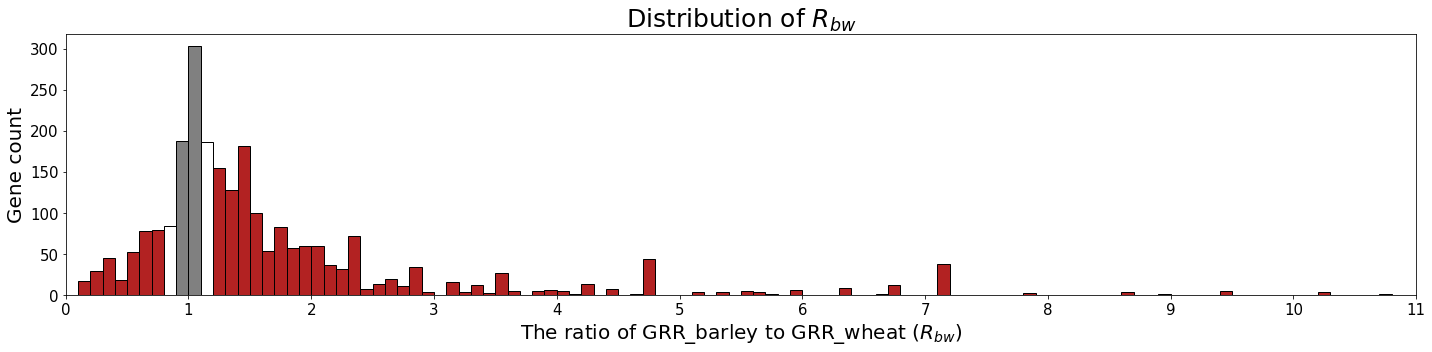

In [4]:
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 25}
plt.rcParams.update(parameters)

fig, ax = plt.subplots(figsize=(20, 5))
N, bins, patches = ax.hist(df_barley["barley/wheat"],bins=np.arange(0,11.1,0.1),edgecolor='k', linewidth=1)

for i in range(0,8):
    patches[i].set_facecolor('firebrick')
for i in range(8,9):
    patches[i].set_facecolor('white')
for i in range(9,11):    
    patches[i].set_facecolor('gray')
for i in range(11,12):
    patches[i].set_facecolor('white')
for i in range(12, len(patches)):
    patches[i].set_facecolor('firebrick')

ax.set_xticks(np.arange(0,12,1))

ax.set(title= r'Distribution of $R_{bw}$', xlabel='The ratio of GRR_barley to GRR_wheat ($R_{bw}$)', ylabel='Gene count')
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
# ax[1].hist(df_barley["barley/emmer"][df_barley["barley/emmer"]<=50],bins=np.arange(0,15,0.2))
# ax[1].title.set_text("barley/emmer")

# ax[2].hist(df_barley["emmer/wheat"],bins=np.arange(0,15,0.2))
# ax[2].title.set_text("emmer/wheat")

# for i in range(0,3,1):
#     ax[i].set_xticks(np.arange(0,15,1))
#plt.legend(loc='upper center')
ax.set_xlim(0,11)
#ax.invert_xaxis()
fig.tight_layout()
plt.show()

In [5]:
fig.savefig("Figure6A_wheatV2.png", dpi=600)

## Figure4B

In [6]:
#HF = pd.read_csv("/Volumes/Elements5T/Programs/gene_duplication_type/retention_rate_calculation_brett_wheat_deletion_lowerCS.csv",header=0)
HF = pd.read_csv("retention_rate_calculation_wheatV2.csv",header=0)

In [7]:
HF.head()

,HOG,OG,Gene Tree Parent Clade,Bdistachyon_pep,EM_A_pep,EM_B_pep,TaCS_A_pep_longest,TaCS_B_pep_longest,TaCS_D_pep_longest,barley,emmer,wheat,barley_rates,wheat_rates,emmer_rates
0,N1.HOG0000000,OG0000000,n27,NaN,NaN,TRIDC6BG006600.1,TraesCS6A02G038600,TraesCS6B02G053500,TraesCS2D02G316700,HORVU.MOREX.r2.6HG0453070.1,TRIDC6BG006600.1,"TraesCS6A02G038600, TraesCS6B02G053500, TraesC...",NaN,0.866667,NaN
1,N1.HOG0000001,OG0000000,n31,NaN,NaN,NaN,TraesCS6A02G038400,TraesCS6B02G053300,NaN,HORVU.MOREX.r2.6HG0453060.1,NaN,"TraesCS6A02G038400, TraesCS6B02G053300",NaN,NaN,NaN
2,N1.HOG0000002,OG0000000,n33,NaN,NaN,NaN,TraesCS7A02G158300,NaN,TraesCS6D02G044300,NaN,NaN,"TraesCS7A02G158300, TraesCS6D02G044300",NaN,NaN,NaN
3,N1.HOG0000003,OG0000000,n34,NaN,NaN,NaN,TraesCS7A02G067800,TraesCS7B02G063000,TraesCS7D02G432000,NaN,NaN,"TraesCS7A02G067800, TraesCS7B02G063000, TraesC...",NaN,NaN,NaN
4,N1.HOG0000004,OG0000000,n36,NaN,NaN,NaN,NaN,TraesCS7B02G062700,TraesCS7D02G061500,NaN,NaN,"TraesCS7B02G062700, TraesCS7D02G061500",NaN,NaN,NaN


In [8]:
df_OGcount = HF.groupby("OG").size().reset_index(name='OG_counts')

In [9]:
df_OGcount.head()

,OG,OG_counts
0,OG0000000,28
1,OG0000001,1
2,OG0000002,10
3,OG0000003,9
4,OG0000004,25


In [10]:
HF2 = HF.merge(df_OGcount,on="OG",how="left")
HF2 = HF2.groupby("OG").mean()

In [11]:
DF1=HF2[(HF2["barley_rates"]>0.1)][["barley_rates","OG_counts"]]
DF2=HF2[(HF2["emmer_rates"]>0.1)][["emmer_rates","OG_counts"]]
DF3=HF2[(HF2["wheat_rates"]>0.1)][["wheat_rates","OG_counts"]]

In [12]:
HF2.head()

,Bdistachyon_pep,barley_rates,wheat_rates,emmer_rates,OG_counts
OG,,,,,
OG0000000,NaN,NaN,0.866667,0.714583,28
OG0000001,NaN,0.691729,NaN,NaN,1
OG0000002,NaN,0.644737,0.573072,0.725000,10
OG0000003,NaN,NaN,0.754839,0.926667,9
OG0000004,NaN,0.894737,0.626667,0.781250,25


In [13]:
DF1.head()

,barley_rates,OG_counts
OG,,
OG0000001,0.691729,1
OG0000002,0.644737,10
OG0000004,0.894737,25
OG0000005,0.818713,24
OG0000006,0.929825,15


In [14]:
DF1.dropna(inplace=True)
DF2.dropna(inplace=True)
DF3.dropna(inplace=True)

In [15]:
DF1["barley_rates"] = DF1["barley_rates"] * 100
DF2["emmer_rates"] = DF2["emmer_rates"] * 100
DF3["wheat_rates"] = DF3["wheat_rates"] * 100

In [16]:
np.arange(0,16,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14])

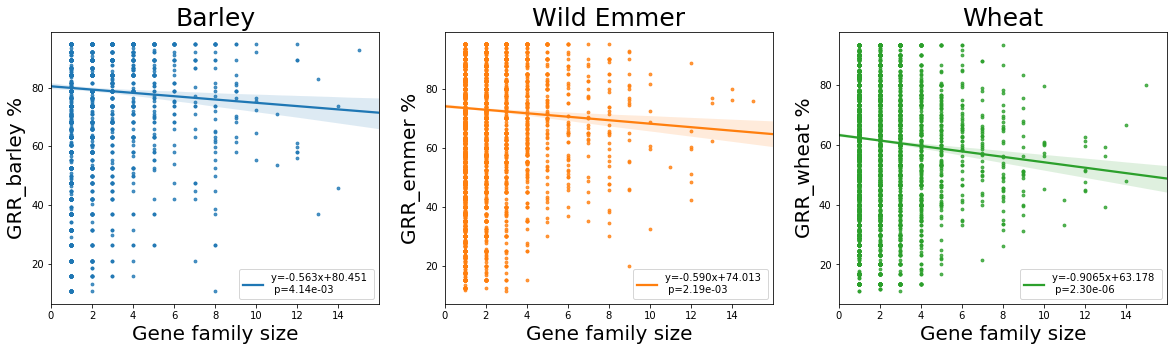

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
slope, intercept, r_value, p_value, std_err = stats.linregress(DF1["OG_counts"],DF1["barley_rates"])
sns.regplot(ax=ax1,x="OG_counts",y="barley_rates",data=DF1,\
            line_kws={'label':"y={0:.3f}x+{1:.3f} \n p={2:.2e}".format(slope,intercept, p_value)},\
           scatter_kws={'s':8})
#ax1.set_ylim([0.2,1.1])
ax1.legend(loc="lower right")
ax1.set_xlim(0,16)
ax1.set_xticks(np.arange(0,16,2))

slope, intercept, r_value, p_value, std_err = stats.linregress(DF2["OG_counts"],DF2["emmer_rates"])
sns.regplot(ax=ax2,x="OG_counts",y="emmer_rates",data=DF2,\
            line_kws={'label':"y={0:.3f}x+{1:.3f} \n p={2:.2e}".format(slope,intercept,p_value)},\
           scatter_kws={'s':8})
ax2.legend()
ax2.set_xlim(0,16)
ax2.set_xticks(np.arange(0,16,2))

slope, intercept, r_value, p_value, std_err = stats.linregress(DF3["OG_counts"],DF3["wheat_rates"])
sns.regplot(ax=ax3,x="OG_counts",y="wheat_rates",data=DF3,\
            line_kws={'label':"y={0:.4f}x+{1:.3f} \n p={2:.2e}".format(slope,intercept,p_value)},\
           scatter_kws={'s':8})
ax3.legend(loc="lower right")
#ax3.set_ylim(0,100)
ax3.set_xlim(0,16)
ax3.set_xticks(np.arange(0,16,2))

ax1.set(title= 'Barley', xlabel='Gene family size', ylabel='GRR_barley %')
ax2.set(title='Wild Emmer',xlabel='Gene family size', ylabel='GRR_emmer %')
ax3.set(title='Wheat',xlabel='Gene family size', ylabel='GRR_wheat %')

plt.show()

In [19]:
fig.savefig("Figure4B_wheatV2.png",dpi=600)

## Figure 4C and 6B

## calculate_retention_rate_brett_wheat_deletion_lowerCS.ipynb
## for grouping data and 
## /Volumes/Elements5T/Programs/gene_duplication_type/wheatV2  for data

In [50]:
## Figure 4C

In [15]:
df_4C = pd.read_excel("/Volumes/Elements5T/Programs/gene_duplication_type/wheatV2/gene_type_count_zh_wheatV2.xlsx",sheet_name="target_gene_wheatV2_test3",\
                     header=None)

In [16]:
df_4C.head()

,0,1
0,singleton,8
1,dispersed,194
2,proximal,48
3,tandem,70
4,WGD,6


In [18]:
df_4C["sum"]=df_4C[1].sum()

In [19]:
df_4C.head()

,0,1,sum
0,singleton,8,326
1,dispersed,194,326
2,proximal,48,326
3,tandem,70,326
4,WGD,6,326


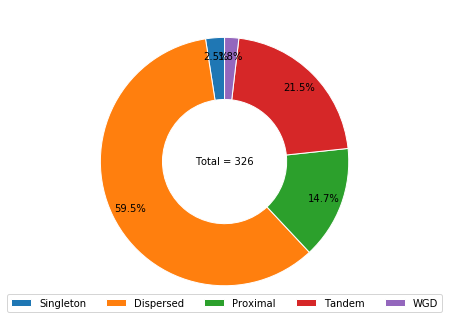

In [31]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
lbls = ['', '', '', '', '']
# sizes = [15, 30, 45, 10]

# Intended to serve something like a global variable
class MyClass:
    i = -1

def func(pct, labels, vals):
    MyClass.i +=1
    # Returns absolute value against the default percentage
    # absolute = int(pct/100.*np.sum(vals))
    # Combine labels and values
    return "{:s}\n{:.0f} %".format(labels[MyClass.i], pct)

fig,ax1 = plt.subplots(1,1,figsize=(6,6))

## with percentage label
ax1.pie(df_4C[1], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
       startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)
##no percentage label
# ax1.pie(df_4C[1], wedgeprops=dict(width=0.5,edgecolor='w'), labels=lbls,\
#         startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr1 = 'Total = ' + str(df_4C[1].sum())
# String on the donut center
ax1.text(0., 0., sumstr1, horizontalalignment='center', verticalalignment='center')

LABELS = ['Singleton', 'Dispersed', 'Proximal', 'Tandem', 'WGD']
plt.legend(LABELS,fontsize=10,ncol=5,loc="lower center")
plt.tight_layout()
plt.show()

In [32]:
fig.savefig("Figure4C_wheatV2_label.png",dpi=600)

In [33]:
fig.savefig("/Volumes/Elements5T/Programs/gene_duplication_type/wheatV2/Figure4C_wheatV2_label.png",dpi=600)

In [49]:
## Figure 6B

In [34]:
df_6b = pd.read_excel("/Volumes/Elements5T/Programs/gene_duplication_type/wheatV2/gene_type_count_zh_wheatV2.xlsx",sheet_name="Group123",\
                     header=None)

In [35]:
df_6b.head()

,0,1,2,3
0,singleton,71,36,10
1,dispersed,935,423,218
2,proximal,200,83,64
3,tandem,353,141,87
4,WGD,62,24,10


In [36]:
df_6b.columns = ["type",">=1.2","0.9-1.1","<=0.8"]

In [37]:
df_6b["sum1"]=df_6b[">=1.2"].sum()
df_6b["sum2"]=df_6b["0.9-1.1"].sum()
df_6b["sum3"]=df_6b["<=0.8"].sum()

In [38]:
df_6b.head()

,type,>=1.2,0.9-1.1,<=0.8,sum1,sum2,sum3
0,singleton,71,36,10,1621,707,389
1,dispersed,935,423,218,1621,707,389
2,proximal,200,83,64,1621,707,389
3,tandem,353,141,87,1621,707,389
4,WGD,62,24,10,1621,707,389


In [27]:
df_6b.type

0    singleton
1    dispersed
2     proximal
3       tandem
4          WGD
Name: type, dtype: object

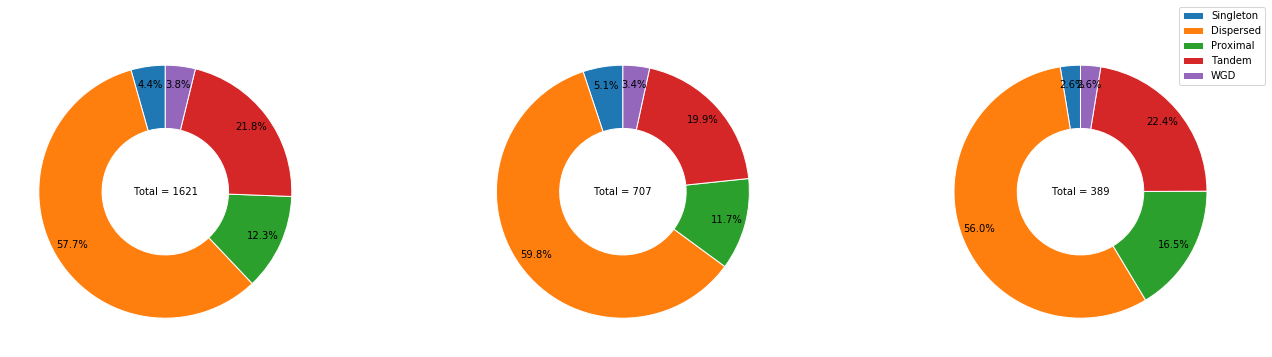

In [58]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
lbls = ['Singleton', 'Dispersed', 'Proximal', 'Tandem', 'WGD']
lbls = ['', '', '', '', '']
# sizes = [15, 30, 45, 10]

# Intended to serve something like a global variable
class MyClass:
    i = -1

def func(pct, labels, vals):
    MyClass.i +=1
    # Returns absolute value against the default percentage
    # absolute = int(pct/100.*np.sum(vals))
    # Combine labels and values
    return "{:s}\n{:.0f} %".format(labels[MyClass.i], pct)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
#fig1, ax1 = plt.subplots()
# Pie wedgeprops with width being the donut thickness
#ax1.pie(df_6b[">=1.2"], wedgeprops=dict(width=0.5), autopct=lambda pct: func(pct, df_6b.type, df_6b[">=1.2"]),
#        shadow=True, startangle=90,pctdistance=1.1, labeldistance=1.2,rotatelabels=True)

ax1.pie(df_6b[">=1.2"], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr1 = 'Total = ' + str(df_6b[">=1.2"].sum())
# String on the donut center
ax1.text(0., 0., sumstr1, horizontalalignment='center', verticalalignment='center')


ax2.pie(df_6b["0.9-1.1"], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr2 = 'Total = ' + str(df_6b["0.9-1.1"].sum())
# String on the donut center
ax2.text(0., 0., sumstr2, horizontalalignment='center', verticalalignment='center')


ax3.pie(df_6b["<=0.8"], wedgeprops=dict(width=0.5,edgecolor='w'), autopct="%.1f%%", labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr3 = 'Total = ' + str(df_6b["<=0.8"].sum())
# String on the donut center
ax3.text(0., 0., sumstr3, horizontalalignment='center', verticalalignment='center')

LABELS = ['Singleton', 'Dispersed', 'Proximal', 'Tandem', 'WGD']
plt.legend(LABELS,fontsize=10,ncol=1,loc="best",bbox_to_anchor=(0.6, 0.6, 0.5, 0.5))

plt.tight_layout()
plt.show()

In [59]:
fig.savefig("Figure6B_wheatV2.png",dpi=600)
fig.savefig("/Volumes/Elements5T/Programs/gene_duplication_type/wheatV2/Figure6B_wheatV2.png",dpi=600)

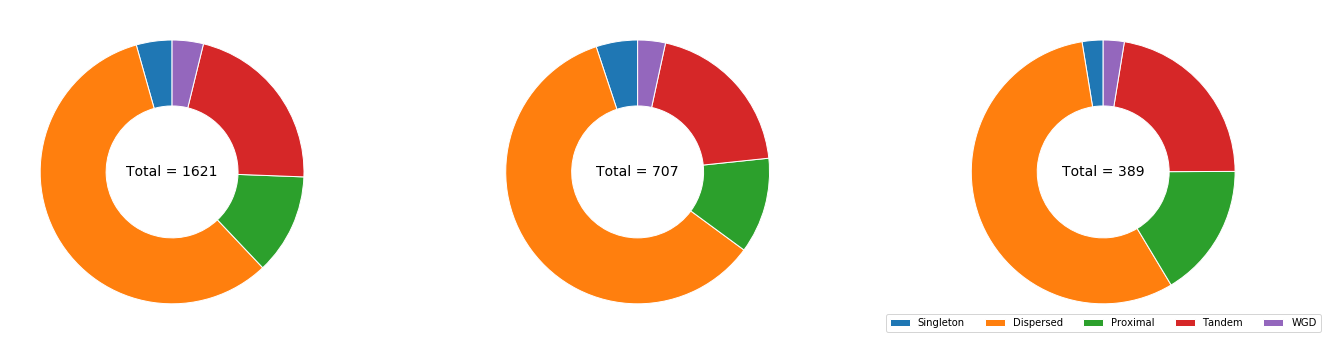

In [44]:
## without percentage labels
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
lbls = ['', '', '', '', '']
# sizes = [15, 30, 45, 10]

# Intended to serve something like a global variable
class MyClass:
    i = -1

def func(pct, labels, vals):
    MyClass.i +=1
    # Returns absolute value against the default percentage
    # absolute = int(pct/100.*np.sum(vals))
    # Combine labels and values
    return "{:s}\n{:.0f} %".format(labels[MyClass.i], pct)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
#fig1, ax1 = plt.subplots()
# Pie wedgeprops with width being the donut thickness
#ax1.pie(df_6b[">=1.2"], wedgeprops=dict(width=0.5), autopct=lambda pct: func(pct, df_6b.type, df_6b[">=1.2"]),
#        shadow=True, startangle=90,pctdistance=1.1, labeldistance=1.2,rotatelabels=True)

ax1.pie(df_6b[">=1.2"], wedgeprops=dict(width=0.5,edgecolor='w'), labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr1 = 'Total = ' + str(df_6b[">=1.2"].sum())
# String on the donut center
ax1.text(0., 0., sumstr1, horizontalalignment='center', verticalalignment='center')


ax2.pie(df_6b["0.9-1.1"], wedgeprops=dict(width=0.5,edgecolor='w'), labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr2 = 'Total = ' + str(df_6b["0.9-1.1"].sum())
# String on the donut center
ax2.text(0., 0., sumstr2, horizontalalignment='center', verticalalignment='center')


ax3.pie(df_6b["<=0.8"], wedgeprops=dict(width=0.5,edgecolor='w'), labels=lbls,\
        startangle=90,pctdistance=0.85, labeldistance=1.1, radius=1)

sumstr3 = 'Total = ' + str(df_6b["<=0.8"].sum())
# String on the donut center
ax3.text(0., 0., sumstr3, horizontalalignment='center', verticalalignment='center')

LABELS = ['Singleton', 'Dispersed', 'Proximal', 'Tandem', 'WGD']
plt.legend(LABELS,fontsize=10,ncol=5,loc="lower center")

plt.tight_layout()
plt.show()

In [45]:
fig.savefig("/Volumes/Elements5T/Programs/gene_duplication_type/wheatV2/Figure6B_wheatV2_nolabel.png",dpi=600)
fig.savefig("Figure6B_wheatV2_nolabel.png",dpi=600)